<a href="https://colab.research.google.com/github/AnkeethaJha-99/DS_projects/blob/main/Wallmart_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import plotly.express as px

In [ ]:
data = pd.read_csv("/content/Walmart (1).csv",parse_dates =['Date'],index_col='Date')

<ipython-input-71-2420a113472c>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data = pd.read_csv("/content/Walmart (1).csv",parse_dates =['Date'],index_col='Date')


In [ ]:
data.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-05-02      1    1643690.90             0        42.31       2.572   
2010-12-02      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-05-03      1    1554806.68             0        46.50       2.625   

                   CPI  Unemployment  
Date                                  
2010-05-02  211.096358         8.106  
2010-12-02  211.242170         8.106  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
2010-05-03  211.350143         8.106

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-05-02 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 402.2 KB


In [ ]:
data_new=pd.DataFrame(data.groupby(['Store'])[['Weekly_Sales','Temperature','Unemployment','Fuel_Price','CPI']].mean())

In [ ]:
data_new

Weekly_Sales  Temperature  Unemployment  Fuel_Price         CPI
Store                                                                 
1      1.555264e+06    68.306783      7.610420    3.219699  215.996892
2      1.925751e+06    68.216364      7.623846    3.219699  215.646311
3      4.027044e+05    71.434196      7.176986    3.219699  219.391531
4      2.094713e+06    62.253357      5.964692    3.216972  128.679669
5      3.180118e+05    69.410140      6.295406    3.219699  216.565581
6      1.564728e+06    69.700000      6.606902    3.219699  217.553197
7      5.706173e+05    39.720280      8.585734    3.241559  193.664243
8      9.087495e+05    62.513986      6.091846    3.219699  219.439026
9      5.439806e+05    67.775175      6.099881    3.219699  219.626689
10     1.899425e+06    72.241189      8.362965    3.575923  128.679669
11     1.356383e+06    72.480769      7.176986    3.219699  219.391531
12     1.009002e+06    70.262797     13.116483    3.606420  128.679669
13     2.003620e+06    53.697133      7.001825    3.286147  128.679669
14     2.020978e+06    57.790979      8.648748    3.417608  186.285678
15     6.233125e+05    51.833846      7.996252    3.578294  135.092607
16     5.192477e+05    45.030070      6.477993    3.241559  193.664243
17     8.935814e+05    46.387203      6.549406    3.286147  128.679669
18     1.084718e+06    53.371259      8.838301    3.441741  135.092607
19     1.444999e+06    52.295035      7.996252    3.578294  135.092607
20     2.107677e+06    55.451399      7.371413    3.417608  209.038131
21     7.560691e+05    68.847622      7.623846    3.219699  215.646311
22     1.028501e+06    54.897133      8.069371    3.441741  139.011284
23     1.389864e+06    48.805105      4.796014    3.441741  135.092607
24     1.356755e+06    54.030000      8.447014    3.578294  135.092607
25     7.067215e+05    52.138392      7.371413    3.417608  209.038131
26     1.002912e+06    43.658252      7.872070    3.441741  135.092607
27     1.775216e+06    57.311119      8.001748    3.578294  139.011284
28     1.323522e+06    70.262797     13.116483    3.606420  128.679669
29     5.394514e+05    54.897133      9.806385    3.441741  135.092607
30     4.385796e+05    68.847622      7.623846    3.219699  215.646311
31     1.395901e+06    68.847622      7.623846    3.219699  215.646311
32     1.166568e+06    52.747552      8.585734    3.241559  193.664243
33     2.598617e+05    76.728182      8.533154    3.575923  128.679669
34     9.667816e+05    58.495874      9.934804    3.216972  128.679669
35     9.197250e+05    57.311119      8.788573    3.417608  139.011284
36     3.735120e+05    71.160350      7.869049    3.204203  214.729069
37     5.189003e+05    71.160350      7.869049    3.219699  214.729069
38     3.857317e+05    70.262797     13.116483    3.606420  128.679669
39     1.450668e+06    70.597343      7.869049    3.219699  214.729069
40     9.641280e+05    47.674545      4.796014    3.441741  135.092607
41     1.268125e+06    48.410350      6.973378    3.241559  193.664243
42     5.564039e+05    72.241189      8.362965    3.575923  128.679669
43     6.333247e+05    68.877692      9.934804    3.219699  207.735162
44     3.027489e+05    53.697133      6.735622    3.286147  128.679669
45     7.859814e+05    57.790979      8.648748    3.417608  186.285678

In [ ]:
data.Holiday_Flag.value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [ ]:
data.drop(['Holiday_Flag'],inplace=True,axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-05-02 to 2012-10-26
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Temperature   6435 non-null   float64
 3   Fuel_Price    6435 non-null   float64
 4   CPI           6435 non-null   float64
 5   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 351.9 KB


SINCE Holiday flag contains most zeros, dropping this column as this may affect our analysis


SUMMARIZING THE DATA USING PROFILE REPORT

In [ ]:
Report = ProfileReport(data)

In [ ]:
Report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

_ there are no missing values
- Looks like Weekly_sales is right skewed , hence it contains outliers
- Temperature is left skewed, it also contains outliers
-No major relationship is found between any independent variable and the target variable

FINDING OUTLIERS

In [138]:
plt.figure(figsize=(5,5))
fig=px.box(data['Weekly_Sales'], x='Weekly_Sales',facet_col_wrap=4)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

<Figure size 500x500 with 0 Axes>

In [ ]:
data=data.reset_index()

In [ ]:
outlier_upper_limit = data['Weekly_Sales'].mean() + 3*(data['Weekly_Sales'].std())
outlier_lower_limit = 3*(data['Weekly_Sales'].std())-data['Weekly_Sales'].mean()  

In [ ]:
data[data['Weekly_Sales']>outlier_upper_limit]['Weekly_Sales'].index

Int64Index([ 189,  241,  471,  475,  523,  526,  527, 1329, 1332, 1333, 1381,
            1385, 1758, 1761, 1762, 1810, 1813, 1814, 1901, 1904, 1905, 1957,
            2759, 2761, 2762, 2763, 2811, 2814, 2815, 3764],
           dtype='int64')

Only 0.4% of the total data has outliers in the Weekly_Sales, since this is a small number but this will affect the analysis, hence removing these 30 records

In [ ]:
data.drop(data[data['Weekly_Sales']>outlier_upper_limit]['Weekly_Sales'].index, axis=0,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6405 entries, 0 to 6434
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6405 non-null   datetime64[ns]
 1   Store         6405 non-null   int64         
 2   Weekly_Sales  6405 non-null   float64       
 3   Temperature   6405 non-null   float64       
 4   Fuel_Price    6405 non-null   float64       
 5   CPI           6405 non-null   float64       
 6   Unemployment  6405 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 400.3 KB


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff4cb6b0790>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff4cb6b0bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff4cb6b04f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff4cb6b10f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff4cb6b1390>],
 'means': []}

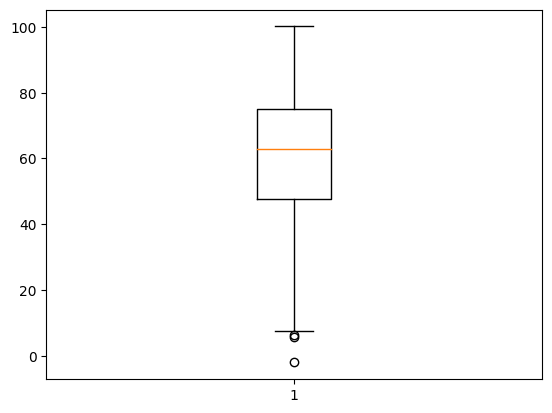

In [ ]:
plt.boxplot(data['Temperature'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff4cb307070>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff4cb3075b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff4cb306dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff4cb307af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff4cb307d90>],
 'means': []}

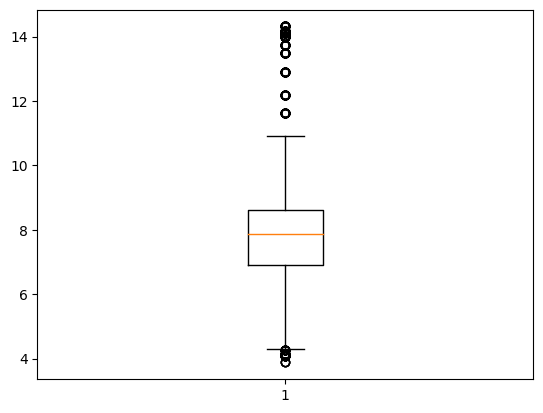

In [ ]:
plt.boxplot(data['Unemployment'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff4cad3d360>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff4cad3d8a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff4cad3d0c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff4cad3dde0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff4cad3e080>],
 'means': []}

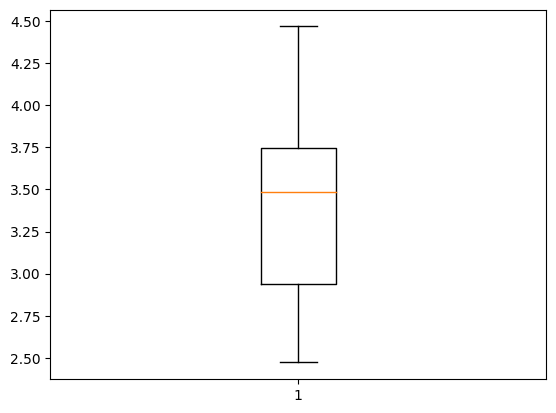

In [ ]:
plt.boxplot(data['Fuel_Price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff4cb385e70>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff4cb3863b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff4cb385bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff4cb3868f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff4cb386b90>],
 'means': []}

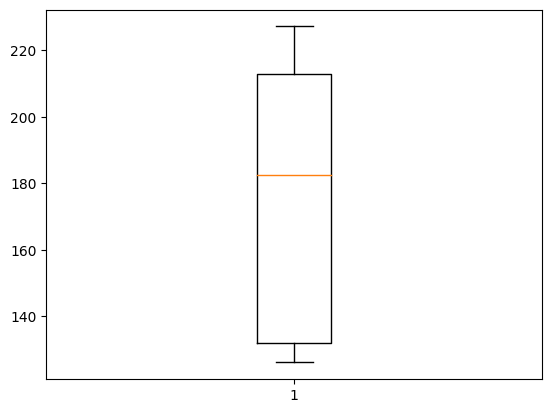

In [ ]:
plt.boxplot(data['CPI'])

In [ ]:
outlier_upper_Temperature = data['Temperature'].mean() + 3*(data['Temperature'].std())
outlier_lower_Temperature = 3*(data['Temperature'].std())-data['Temperature'].mean()  

In [ ]:
outlier_upper_Unemployment = data['Unemployment'].mean() + 3*(data['Unemployment'].std())
outlier_lower_Unemployment = 3*(data['Unemployment'].std())-data['Unemployment'].mean() 

In [ ]:
data[data['Temperature']<= outlier_lower_Temperature]

Empty DataFrame
Columns: [Store, Weekly_Sales, Temperature, Fuel_Price, CPI, Unemployment]
Index: []

In [ ]:
data[data['Unemployment']> outlier_upper_Unemployment]

Store  Weekly_Sales  Temperature  Fuel_Price         CPI  \
Date                                                                   
2010-05-02     12    1100046.37        49.47       2.962  126.442065   
2010-12-02     12    1117863.33        47.87       2.946  126.496258   
2010-02-19     12    1095421.65        54.83       2.915  126.526286   
2010-02-26     12    1048617.17        50.23       2.825  126.552286   
2010-05-03     12    1077018.27        53.77       2.987  126.578286   
...           ...           ...          ...         ...         ...   
2011-05-27     38     356886.10        76.67       4.087  129.062355   
2011-03-06     38     396826.06        71.81       4.031  129.049032   
2011-10-06     38     381763.02        78.72       3.981  129.035710   
2011-06-17     38     356797.00        86.84       3.935  129.043200   
2011-06-24     38     354078.95        88.95       3.898  129.066300   

            Unemployment  
Date                      
2010-05-02        13.975  
2010-12-02        13.975  
2010-02-19        13.975  
2010-02-26        13.975  
2010-05-03        13.975  
...                  ...  
2011-05-27        13.736  
2011-03-06        13.736  
2011-10-06        13.736  
2011-06-17        13.736  
2011-06-24        13.736  

[207 rows x 6 columns]

In [ ]:
data.drop(data[data['Unemployment']>outlier_upper_Unemployment]['Unemployment'].index, axis=0,inplace=True)

In [ ]:
data.describe()

Store  Weekly_Sales  Temperature   Fuel_Price          CPI  \
count  6186.000000  6.186000e+03  6186.000000  6186.000000  6186.000000   
mean     22.944714  1.042148e+06    60.525876     3.361344   173.207274   
std      13.052553  5.497004e+05    18.461749     0.461728    39.131916   
min       1.000000  2.099862e+05    -2.060000     2.472000   126.064000   
25%      11.000000  5.551024e+05    47.175000     2.917000   132.614193   
50%      23.000000  9.557040e+05    62.650000     3.471500   188.130800   
75%      34.000000  1.424432e+06    74.850000     3.738000   213.190421   
max      45.000000  2.740057e+06   100.140000     4.468000   227.232807   

       Unemployment  
count   6186.000000  
mean       7.786962  
std        1.518320  
min        3.879000  
25%        6.885000  
50%        7.852000  
75%        8.523000  
max       13.503000

In [ ]:
data.index = data.Date

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6186 entries, 2010-05-02 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6186 non-null   datetime64[ns]
 1   Store         6186 non-null   int64         
 2   Weekly_Sales  6186 non-null   float64       
 3   Temperature   6186 non-null   float64       
 4   Fuel_Price    6186 non-null   float64       
 5   CPI           6186 non-null   float64       
 6   Unemployment  6186 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 386.6 KB


SALES OF EACH STORE 

In [100]:
data_new = pd.DataFrame(data_new.sort_values(['Weekly_Sales']))
data_new

Weekly_Sales  Temperature  Unemployment  Fuel_Price         CPI
Store                                                                 
33     2.598617e+05    76.728182      8.533154    3.575923  128.679669
44     3.027489e+05    53.697133      6.735622    3.286147  128.679669
5      3.180118e+05    69.410140      6.295406    3.219699  216.565581
36     3.735120e+05    71.160350      7.869049    3.204203  214.729069
38     3.857317e+05    70.262797     13.116483    3.606420  128.679669
3      4.027044e+05    71.434196      7.176986    3.219699  219.391531
30     4.385796e+05    68.847622      7.623846    3.219699  215.646311
37     5.189003e+05    71.160350      7.869049    3.219699  214.729069
16     5.192477e+05    45.030070      6.477993    3.241559  193.664243
29     5.394514e+05    54.897133      9.806385    3.441741  135.092607
9      5.439806e+05    67.775175      6.099881    3.219699  219.626689
42     5.564039e+05    72.241189      8.362965    3.575923  128.679669
7      5.706173e+05    39.720280      8.585734    3.241559  193.664243
15     6.233125e+05    51.833846      7.996252    3.578294  135.092607
43     6.333247e+05    68.877692      9.934804    3.219699  207.735162
25     7.067215e+05    52.138392      7.371413    3.417608  209.038131
21     7.560691e+05    68.847622      7.623846    3.219699  215.646311
45     7.859814e+05    57.790979      8.648748    3.417608  186.285678
17     8.935814e+05    46.387203      6.549406    3.286147  128.679669
8      9.087495e+05    62.513986      6.091846    3.219699  219.439026
35     9.197250e+05    57.311119      8.788573    3.417608  139.011284
40     9.641280e+05    47.674545      4.796014    3.441741  135.092607
34     9.667816e+05    58.495874      9.934804    3.216972  128.679669
26     1.002912e+06    43.658252      7.872070    3.441741  135.092607
12     1.009002e+06    70.262797     13.116483    3.606420  128.679669
22     1.028501e+06    54.897133      8.069371    3.441741  139.011284
18     1.084718e+06    53.371259      8.838301    3.441741  135.092607
32     1.166568e+06    52.747552      8.585734    3.241559  193.664243
41     1.268125e+06    48.410350      6.973378    3.241559  193.664243
28     1.323522e+06    70.262797     13.116483    3.606420  128.679669
11     1.356383e+06    72.480769      7.176986    3.219699  219.391531
24     1.356755e+06    54.030000      8.447014    3.578294  135.092607
23     1.389864e+06    48.805105      4.796014    3.441741  135.092607
31     1.395901e+06    68.847622      7.623846    3.219699  215.646311
19     1.444999e+06    52.295035      7.996252    3.578294  135.092607
39     1.450668e+06    70.597343      7.869049    3.219699  214.729069
1      1.555264e+06    68.306783      7.610420    3.219699  215.996892
6      1.564728e+06    69.700000      6.606902    3.219699  217.553197
27     1.775216e+06    57.311119      8.001748    3.578294  139.011284
10     1.899425e+06    72.241189      8.362965    3.575923  128.679669
2      1.925751e+06    68.216364      7.623846    3.219699  215.646311
13     2.003620e+06    53.697133      7.001825    3.286147  128.679669
14     2.020978e+06    57.790979      8.648748    3.417608  186.285678
4      2.094713e+06    62.253357      5.964692    3.216972  128.679669
20     2.107677e+06    55.451399      7.371413    3.417608  209.038131

In [147]:
y=data.groupby(['Store'])['Weekly_Sales'].mean()
y

Store
1     1.555264e+06
2     1.905830e+06
3     4.027044e+05
4     2.056343e+06
5     3.180118e+05
6     1.564728e+06
7     5.706173e+05
8     9.087495e+05
9     5.439806e+05
10    1.852745e+06
11    1.356383e+06
12    1.018890e+06
13    1.957682e+06
14    1.986529e+06
15    6.233125e+05
16    5.192477e+05
17    8.935814e+05
18    1.084718e+06
19    1.444999e+06
20    2.058998e+06
21    7.560691e+05
22    1.028501e+06
23    1.389864e+06
24    1.356755e+06
25    7.067215e+05
26    1.002912e+06
27    1.766041e+06
28    1.308318e+06
29    5.394514e+05
30    4.385796e+05
31    1.395901e+06
32    1.166568e+06
33    2.598617e+05
34    9.667816e+05
35    9.197250e+05
36    3.735120e+05
37    5.189003e+05
38    4.188868e+05
39    1.450668e+06
40    9.641280e+05
41    1.268125e+06
42    5.564039e+05
43    6.333247e+05
44    3.027489e+05
45    7.859814e+05
Name: Weekly_Sales, dtype: float64

In [148]:
plt.figure(figsize=(15,8))
px.bar(y)
# plt.xlabel('Store')
# plt.ylabel('Weekly_Sales_aggregate')
# plt.xticks(data_new.index)

<Figure size 1500x800 with 0 Axes>

From the plot, it is clear that store 20 has the highest Sales aggregate

In [122]:
data_Store1= pd.DataFrame(data.groupby(data.index)['Weekly_Sales'].sum())
data_Store1

Weekly_Sales
Date                    
2010-01-10   39825602.62
2010-02-04   47601520.01
2010-02-07   46204385.56
2010-02-19   45363033.79
2010-02-26   41043557.90
...                  ...
2012-10-08   47403451.04
2012-10-19   45122410.57
2012-10-26   45544116.29
2012-11-05   46925878.99
2012-12-10   46128514.25

[143 rows x 1 columns]

In [128]:


fig = px.line(data_Store1)
fig.show()

In [170]:
z=pd.DataFrame(data[data['Store']==1]['Weekly_Sales'])
z['Store']=1
z=z.sort_index()
z

Weekly_Sales  Store
Date                           
2010-01-10    1453329.50      1
2010-02-04    1594968.28      1
2010-02-07    1492418.14      1
2010-02-19    1611968.17      1
2010-02-26    1409727.59      1
...                  ...    ...
2012-10-08    1592409.97      1
2012-10-19    1508068.77      1
2012-10-26    1493659.74      1
2012-11-05    1611096.05      1
2012-12-10    1573072.81      1

[143 rows x 2 columns]

In [175]:
for store in data['Store'].unique():
  z=data[data['Store']==store]['Weekly_Sales']
  z=z.sort_index()
  fig=px.line(z, labels={
                     "Date": "Dates",
                     "value":"WeeklySales"
                     
                 },
                title="Weekly Sales of Store - "+str(store))
  fig.show()

Analysis from the above plots
-- The overall sales of all the stores combined has a constant mean over years with little fluctuations and it also shows slightly increasing trend

-- store 1 - has constant mean and less fluctuation, no increasing trend is observed
-- store 2 - has constant mean and less fluctuation, no increasing trend is observed
-- store 3 - has constant mean and less fluctuation, no increasing trend is observed, seasonalty might be there
-- store 4 - has constant mean and less fluctuation, increasing trend is observed
-- store 5 - has constant mean and less fluctuation, no increasing trend is observed
--store 6 - has constant mean and less fluctuation, no increasing trend is observed
--store 7 - has constant mean and less fluctuation, no increasing trend is observed
--store 8 - has constant mean and less fluctuation, no increasing trend is observed
-- store 9 - has constant mean and less fluctuation, no increasing trend is observed
-- All stores have the same observation
-- except store -9,36, shows a decresing trend over time
-- store -42,44 shows an increasing trend

We would like to plot the other numerical columns as well and check if they have any impact on the weekly sales

In [177]:
for store in data['Store'].unique():
  z= pd.DataFrame(data[data['Store']==store][['Unemployment','CPI','Temperature','Fuel_Price']])
  z=z.sort_index()
  fig=px.line(z, labels={
                     "Date": "Dates",
                     
                     
                 },
                title="Weekly Sales of Store - "+str(store))
  fig.show()

From the above plots we can find that the Fuel_price,CPI,Unemployment are nearly constant.
Only Temperature is varying over time.

We need to check if the time series of weekly plots are stationary in order to predict the future, if not stationary we need to make them stationary

In [179]:
#AD-Fuller test to check stationarity
from statsmodels.tsa.stattools import adfuller


In [185]:

z_weekly = pd.DataFrame(data[data['Store']==1]['Weekly_Sales'])
z_weekly=z_weekly.sort_index()

In [192]:
adfuller_result=[]
for store in data['Store'].unique():
  z=pd.DataFrame(data[data['Store']==store]['Weekly_Sales'])
  z=z.sort_index()
  # print("Store - "+ str(store)+" Observations of Dickey-fuller test")
  dftest = adfuller(z['Weekly_Sales'],autolag='AIC')
  adfuller_result.append({"Store-"+str(store):dftest[1]})
  # dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
  # for key,value in dftest[4].items():
  #   dfoutput['critical value (%s)'%key]= value
adfuller_result

[{'Store-1': 1.981888230415561e-16},
 {'Store-2': 1.9567891838187306e-05},
 {'Store-3': 7.219753620366216e-16},
 {'Store-4': 0.612504918192744},
 {'Store-5': 1.627457837725422e-17},
 {'Store-6': 3.1445943866631013e-16},
 {'Store-7': 9.305842097801457e-11},
 {'Store-8': 4.122113430577604e-17},
 {'Store-9': 5.32311095860336e-16},
 {'Store-10': 1.1364277436719288e-18},
 {'Store-11': 1.2915420192508846e-15},
 {'Store-12': 1.1313607336674808e-08},
 {'Store-13': 0.0013952286004291197},
 {'Store-14': 0.5745372307634133},
 {'Store-15': 1.4838476492343309e-15},
 {'Store-16': 2.480057395305973e-13},
 {'Store-17': 5.15768158947881e-05},
 {'Store-18': 2.8023855276952104e-16},
 {'Store-19': 9.198914155570677e-16},
 {'Store-20': 1.2501840197406978e-18},
 {'Store-21': 8.570754050081204e-15},
 {'Store-22': 1.6312269985099972e-17},
 {'Store-23': 5.106013475604763e-16},
 {'Store-24': 7.964318543528675e-17},
 {'Store-25': 5.378912726460914e-17},
 {'Store-26': 6.005254384301212e-16},
 {'Store-27': 1.89351

In [198]:
#check fior non stationary series
non_stationary=[]
for i in adfuller_result:
  for value in i.values():
    if value<0.05:
      non_stationary.append(i)
non_stationary

[{'Store-1': 1.981888230415561e-16},
 {'Store-2': 1.9567891838187306e-05},
 {'Store-3': 7.219753620366216e-16},
 {'Store-5': 1.627457837725422e-17},
 {'Store-6': 3.1445943866631013e-16},
 {'Store-7': 9.305842097801457e-11},
 {'Store-8': 4.122113430577604e-17},
 {'Store-9': 5.32311095860336e-16},
 {'Store-10': 1.1364277436719288e-18},
 {'Store-11': 1.2915420192508846e-15},
 {'Store-12': 1.1313607336674808e-08},
 {'Store-13': 0.0013952286004291197},
 {'Store-15': 1.4838476492343309e-15},
 {'Store-16': 2.480057395305973e-13},
 {'Store-17': 5.15768158947881e-05},
 {'Store-18': 2.8023855276952104e-16},
 {'Store-19': 9.198914155570677e-16},
 {'Store-20': 1.2501840197406978e-18},
 {'Store-21': 8.570754050081204e-15},
 {'Store-22': 1.6312269985099972e-17},
 {'Store-23': 5.106013475604763e-16},
 {'Store-24': 7.964318543528675e-17},
 {'Store-25': 5.378912726460914e-17},
 {'Store-26': 6.005254384301212e-16},
 {'Store-27': 1.8935187369191862e-05},
 {'Store-28': 8.047008637678853e-11},
 {'Store-29'

Observations of Dickey-fuller test
Test Statistic                -9.595634e+00
p-value                        1.981888e-16
#lags used                     0.000000e+00
number of observations used    1.420000e+02
critical value (1%)           -3.477262e+00
critical value (5%)           -2.882118e+00
critical value (10%)          -2.577743e+00
dtype: float64
